<a href="https://colab.research.google.com/github/Tha-vw/DataAnalysis-BestPractices/blob/main/Data_Analysis_%26_Best_Practices_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Data Analysis & Best Practices**
---

#####Thaiz Wyns
<br>


This notebook is part of the PUC-Rio Postgraduation Course in Data Science & Analytics.
<br><br>
Sprint III: Data Analysis & Best Practices.
<br><br>
This project focuses on analysing a dataset by leveraging data analysis best practices, starting from exploratory analysis to data preprocessing using Python and its libraries.

I began by clearly defining the problem and gaining insights into the dataset through a combination of descriptive statistics and visualizations. After iterating through the data and getting familiar with it, I proceeded with the data preprocessing step to prepare the dataset for further analysis.

## Table of contents
1. Problem Definition and Objective<br>
    1.1 Problem Definition<br>
    1.2 Objective
2. Data Preparation<br>
    2.1 Dataset Loading<br>
    2.2 Dataset Attributes Description<br>
3. Data Analysis<br>
    3.1 Descriptive Statistics<br>

    3.2 Visualization - Histogram, Line Plot and Bar Plot<br>
    3.2.1 Histogram<br>
    3.2.2 Line Plot<br>
    3.2.3 Bar Plot<br>

    3.3 Categorical Visualization<br>
    3.3.1 Pie Chart<br>

    3.4 Box Plot<br>

    3.5 Visualization - Correlation Matrix and Scatterplot<br>
    3.5.1 Correlation Matrix<br>
    3.5.2 Scatterplot<br>
4. Data Preprocessing<br>
    4.1 Data Cleaning<br>
    4.1.1 Outliers<br>
    4.1.2 Label Encoding<br>
    4.1.3 Splitting the Data into Training Set and Test Set<br>
    4.1.4 Normalization and Standardization
   
5. Conclusion<br>

6. Recommendations<br>
    
7. Further Considerations<br>
    

# 1.0 Problem Definition and Objective


## 1.1 Problem Definition
The increasing market demands, intense competition and rising consumer expectations have led superstores to invest in different ways to position themselves strategically.
<br><br>

Through data analytics, superstores can anticipate customer needs, identify inefficiencies such as underperforming products and inventory issues and customize marketing efforts. Those are some of the factors which will help them stay ahead of competitors by meeting market demands, while also finding sales opportunities.
<br><br>

Furthermore, data-driven insights strengthen superstores' ability to adapt in real-time to changing market conditions. Quick adjustments in pricing, promotions / discounts, and online presence are made possible, allowing retailers to thrive in a competitive market where margins are tight, and data becomes a key tool for long-term success.
<br><br>

**Superstore explained:**<br>
A superstore is a large retail establishment that offers a vast selection of products under one roof, ranging from groceries and household goods to clothing, furniture, machinery, amongst others. With competitively priced groceries and discounted non-food items, superstores appeal to budget-conscious shoppers looking for convenience and value in a single location.<br><br>

A fictitious superstore - which will be called ***MegaMart Hub*** for better involvement in this project - is looking to determine the most effective strategies for their success.
<br><br>

Therefore, our focus is to ***determine whether MegaMart Hub's profitability, both gains and losses, is driven by specific sub-categories of the dataset***, highlighting the need for a revised market strategy.




## 1.2 Objective

By analyzing the ***MegaMart Hub*** **Superstore dataset**, we will conduct a comprehensive examination of the trends, aiming to uncover insights and relationships that address the problem outlined above.<br><br>

The dataset consists of orders placed at a United States Superstore between January 2014 and December 2017.<br><br>

Furthermore, it suggests a Regression type of Supervised Learning, which shows labelled data with the goal of finding a relationship between the input variables and the desired output. There is already an attribute 'Profit' in the dataset, indicating if profit or loss has occurred. <br><br>


It contains information on variables such as order date, country, city, state, region, category, subcategory, sales, quantity, discount, and profit, among others. This data is essential for evaluating the profit trends at ***MegaMart Hub*** and identifying patterns that either drive or hinder profitability.<br><br>

In this study, some hypotheses were proposed:

1. Is the profit higher during the end of the year seasonal period (November - December / Christmas)?

2. Is the profit lower during January and February, after the end of the year seasonal period?

3. Has the discount applied on products had a positive impact on the profits?   

4. Can we say that higher sales translate into higher profit for ***MegaMart Hub***? If so, does profit grow at the same scale as sales?  

In [50]:
# Importing image
from IPython.display import Image
Image(url='https://i.cbc.ca/1.5091833.1708123273!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_780/loblaw-results-20180725.jpg')

# 2.0 Data Preparation
In this session, we will start by importing available libraries, uploading the dataset and describing its attributes.

This will establish the basis for a more in-depth data analysis, enabling us to better understand the problem at hand.

## 2.1 Dataset Loading
The original dataset comes from [Tableau](https://public.tableau.com/app/profile/sandra.resan/viz/UnitedStatesSuperstoreSalesAnalysis/SalesOverTimeWithForecast) and it is available in .csv format in [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final). It is a single file with 21 features and widely used for data analysis and marketing business cases. We will import the dataset using Pandas, from the Python Library.<br><br>

***Restrictions and Condition for the chosen dataset:*** the dataset initially chosen was within the size limit supported by a free GitHub account for uploading purposes. However, it contained only 13 features, which would make the analysis somewhat limited. The full superstore dataset, which includes all 21 features used in this project, exceeds GitHub's standard size limits. As a result, it was uploaded using Git LFS (Large File Storage) with the support of an SSH authentication key.

In [51]:
# Importing Pandas
import pandas as pd
import missingno as ms # for missings treatment
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as ms # Visualization and analysis of missing data patterns

import plotly.express as px

# Import Libraries for Supervised Learning Data
import numpy as np
from sklearn.preprocessing import StandardScaler # Padronization
from sklearn.preprocessing import Normalizer # Normalization of rows
from sklearn.preprocessing import MinMaxScaler # Scale each feature to a given range
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1
from sklearn.model_selection import train_test_split


# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Setting seaborn color palette
palette = sns.color_palette("flare", as_cmap=True)

In [52]:
# Dataset URL
filename = "https://media.githubusercontent.com/media/Tha-vw/DataAnalysis-BestPractices/main/Sample%20-%20Superstore.csv"


# Read the file
superstore = pd.read_csv(filename, encoding='latin-1')



In [53]:
# check the dataset type
print(type(superstore))

# Show the first rows of the dataset
superstore.head()

<class 'pandas.core.frame.DataFrame'>


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


We can clearly see the dataset has been uploaded correctly and it shows all the 21 features.

In [54]:
# Show the dataset type
print(type(superstore))

<class 'pandas.core.frame.DataFrame'>


## 2.2 Dataset Attributes Description
For a better understanding of what each feature of the dataset means, they are described as per list below:

1. Row ID (Whole number) => Unique ID for each row.
2. Order ID (String) => Unique Order ID for each Customer.
3. Order Date (Date) => Order Date of the product.
4. Ship Date (Date) => Shipping Date of the Product.
5. Ship Mode (String) => Shipping Mode specified by the Customer (Four values: First Class, Same Day, Second Class, Standard Class).
6. Customer ID (String) => Unique ID to identify each Customer.
7. Customer Name (String) => Name of the Customer.
8. Segment (String) => The segment where the Customer belongs (Three values: Consumer, Corporate, Home Office).
9. Country (String) => Country of residence of the Customer (Value: United States).
10. City (String) => City of residence of of the Customer.
11. State (String) => State of residence of the Customer.
12. Postal Code (Whole number) => Postal Code of every Customer.
13. Region (String) => Region where the Customer belong (Four values: Central, East, South, West).
14. Product ID (String) => Unique ID of the Product.
15. Category (String) => Category of the product ordered (Three values: Furniture, Office Supplies, Technology).
16. Sub-Category (String) => Sub-Category of the product ordered.
17. Product Name (String) => Name of the Product
18. Sales (Currency) => Sales of the Product.
19. Quantity (Currency) => Quantity of the Product.
20. Discount (Currency) => Discount provided.
21. Profit (Currency) => Profit/Loss incurred.





# 3.0 Data Analysis
   

Although we will investigate most of the features in the dataset, we will prioritize the following due to time constraints: Order Date, Subcategories, Sales and Discount.

The analysis starts with descriptive statistics, aligning key central features to gain a clear understanding of the dataset.

## 3.1 Descriptive Statistics

Now we will begin by examining the ***MegaMart Hub*** Superstore dataset, including its dimensions, structure, and a few sample rows. Therefter, we'll review the attributes data types in the uploaded file and display a small sample of the first and last 10 rows to assess its content and ensure the data was imported as intended.

In [55]:
# Show the size and dimension of the dataset. First number is the rows and second the columns
print(superstore.shape)

(9994, 21)


As we can see above, the dataset consists of 9994 rows representing the ***MegaMart Hub*** orders between January 2014 and December 2017 and 21 columns related to their operational tracking records.

In [56]:
# Check for null values and data type
print(superstore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Observations**:

- We can confirm that there are 21 columns and no null values in the dataset.

- The columns "Order Date" and "Ship Date" are currently stored as object types.

- Dates are in MM/DD/YYYY format. Datetime columns need to be converted accordingly.

- Feature types are mostly object with 15 occurrencies, 3 float64 and 3 int64.

- The columns "Row ID", "Postal Code" and "Quantity" are represented as integers.

- The columns "Sales", "Discount" and "Profit" are represented as floating-point numbers.


In [57]:
# Convert datetime columns to datetime objects

superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])
min_date = superstore['Order Date'].min()
max_date = superstore['Order Date'].max()


superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [58]:
# Show a glimpse of the dataset - random sample
superstore.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4908,4909,CA-2014-133809,2014-11-18,2014-11-23,Second Class,MS-17530,MaryBeth Skach,Consumer,United States,Fairfield,...,45014,East,TEC-PH-10004875,Technology,Phones,PNY Rapid USB Car Charger - Black,9.588,2,0.4,-2.0774
4523,4524,CA-2014-107454,2014-11-02,2014-11-06,Standard Class,RD-19720,Roger Demir,Consumer,United States,New York City,...,10024,East,OFF-LA-10001569,Office Supplies,Labels,Avery 499,34.860,7,0.0,16.0356
880,881,CA-2017-111689,2017-11-30,2017-12-02,Second Class,HP-14815,Harold Pawlan,Home Office,United States,New York City,...,10024,East,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,1242.900,5,0.1,262.3900
3933,3934,CA-2017-123001,2017-09-02,2017-09-08,Standard Class,AW-10840,Anthony Witt,Consumer,United States,Bakersfield,...,93309,West,OFF-AR-10001919,Office Supplies,Art,"OIC #2 Pencils, Medium Soft",9.400,5,0.0,2.7260
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
2624,2625,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-PH-10001494,Technology,Phones,Polycom CX600 IP Phone VoIP phone,2399.600,8,0.0,647.8920
9676,9677,US-2014-120175,2014-11-28,2014-12-03,Standard Class,MC-17635,Matthew Clasen,Corporate,United States,Richmond,...,47374,Central,OFF-EN-10003862,Office Supplies,Envelopes,Laser & Ink Jet Business Envelopes,64.020,6,0.0,29.4492
2245,2246,CA-2017-103380,2017-11-21,2017-11-25,Standard Class,BF-11005,Barry Franz,Home Office,United States,Pasadena,...,91104,West,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",8.620,1,0.0,2.2412
7144,7145,US-2017-141558,2017-03-11,2017-03-16,Standard Class,MH-17290,Marc Harrigan,Home Office,United States,Philadelphia,...,19140,East,OFF-BI-10002794,Office Supplies,Binders,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",12.294,1,0.7,-8.6058
1632,1633,CA-2016-106530,2016-05-08,2016-05-08,Same Day,CL-12565,Clay Ludtke,Consumer,United States,Cleveland,...,44105,East,OFF-PA-10004451,Office Supplies,Paper,Xerox 222,10.368,2,0.2,3.6288


In [59]:
# Show the first 10 rows of the dataset
superstore.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [60]:
# Show the last 10 rows of the dataset
superstore.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


Verifying data types is a crucial step to ensure accurate and effective handling of the dataset. Data types have a direct impact on how the dataset can be manipulated and analyzed.

We will convert "Postal Code" from integer to object as it is not used for calculations.

In [61]:
superstore['Postal Code'] = superstore['Postal Code'].astype(str)

superstore.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


There are no duplicates or *null* values, so we can continue with the dataset statistics summary.

In [62]:
# Checking for duplicates, null in the sample subset

def basic_EDA(superstore):
    size = superstore.shape
    sum_duplicates = superstore.duplicated().sum()
    sum_null = superstore.isnull().sum().sum()
    is_NaN = superstore. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = superstore[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / superstore.shape[0])*100))

In [63]:
basic_EDA(superstore=superstore)

Number of Samples: 9994,
Number of Features: 21,
Duplicated Entries: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


Next, we can see the 17 unique sub-categories from the dataset which will be part of our investigation.

In [64]:
print(superstore['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


Let's now assess if the dataset is balanced looking at the class distribution below. Initially, the negative profit draws our attention (min) and the sales present a very large number (max), diverging from the other metrics. We will address those numbers later in the analysis to see if they are outliers.

In [65]:
# Dataset statistics summary (mean, standard deviation, minimum, maximum and quartiles (Q1, Q2, Q3)) and its need to be scaled
superstore.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


We provide an overview of our total sales and profit for clearer tracking.

In [66]:
# Calculate total sales and total profit
total_sales = superstore['Sales'].sum()
total_profit = superstore['Profit'].sum()

# Print the calculated values
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


## 3.2 Visualization - Histogram, Line Plot and Bar Plot



###3.2.1 Histogram

In the Histogram it is possible to visually represent patterns in the numerical data and quickly provide an overview of the variables' distribution.

**Observations:**

- We will find that Quantity and Discount present a bimodal distribution and are somewhat right-skewed.

- Discount might be seen as an outlier since responses deviate significantly from the rest of the data values. However, the nature of this data allows Discount to be either absent or a large number, which will depend on MegaMart Hub pricing strategies.

- Some of the variables adopted for this analysis have negative or very low values, as in the case of Sales, Profit and Discount.

Let us take a look at them in more details so that the visuals here do not mislead our conclusions.

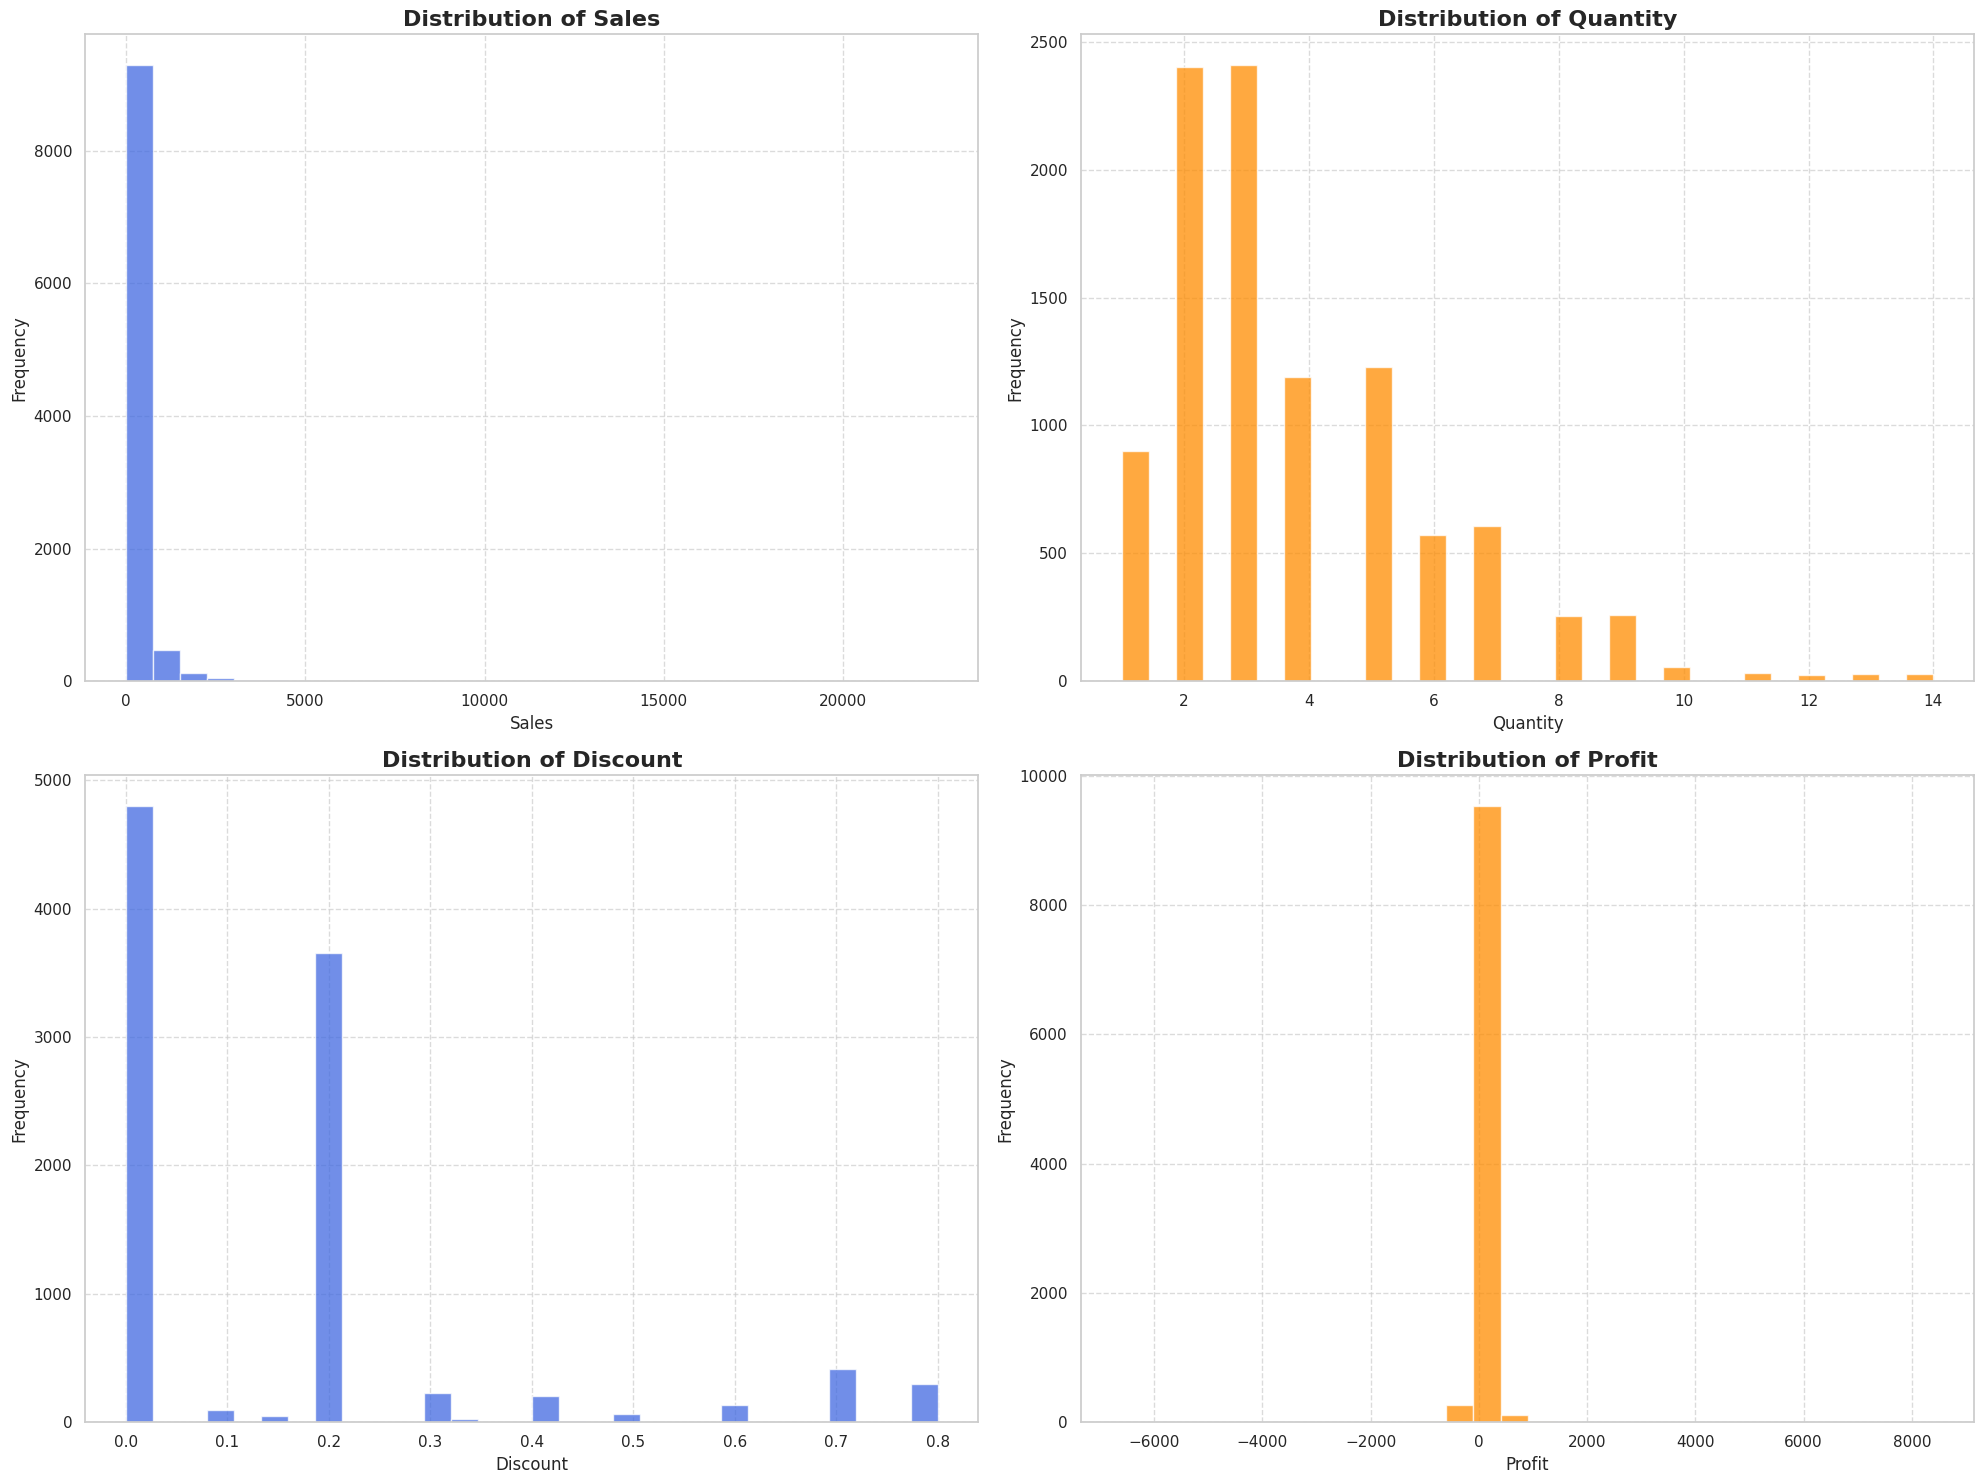

In [67]:
axes = superstore.hist(column=["Sales", "Quantity", "Discount", "Profit"], figsize=(20, 15), layout=(2, 2), bins=30)

label = ["Sales", "Quantity", "Discount", "Profit"]
colors = ['royalblue', 'darkorange']

# Iterate through each axis
for i, ax in enumerate(axes.flatten()):
    if i < len(label):
        ax.set_title(f"Distribution of {label[i]}", fontsize=16, fontweight="bold")
        ax.set_xlabel(f"{label[i]}", fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)

        ax.grid(True, linestyle='--', alpha=0.7)

        # Transparency
        for patch in ax.patches:
            patch.set_facecolor(colors[i % 2])
            patch.set_alpha(0.75)

plt.tight_layout()
plt.show()

**Observations:**

- The histogram below displays the number of orders over time, highlighting a steady increase in MegaMart Hub's orders, which suggests sales growth.

- It also confirms our first two hypotheses, revealing that November and December experience the highest order peaks, while January sees a significant drop.

- It is important to also pinpoint September on the graph due to its order peak.

In [68]:
graph_title = 'Orders made over the years (2014-2017)'
column_superstore = 'Order Date'
x_label = 'Orders by date'

px.histogram(data_frame=superstore, x=column_superstore, nbins=48, labels={column_superstore: x_label},
            title=graph_title)

###3.2.2 Line Plot

**Observations:**

- We can now assume the orders peak in September is due to the end of the quarter and the start of the most profitable quarter, which is close to Christmas, as per line graph below.

- MegaMart Hub probably secured a marketing strategy for its previous season inventory, making no dramatic changes in discounts applied as they usually do mostly in January and February.

In [69]:
col = 'Discount'
title='Discount over the years (2014-2017)'

aux = superstore[[col, 'Order Date']].groupby('Order Date').mean()
px.line(data_frame=aux, x=aux.index, y=col, title=title, color_discrete_sequence=['darkgreen'])

**Observations:**

- Year 2015 Operations, MegaMart Hub gained a surprising sales peak and drop in profits in January, which could be an outlier but also reflects potential operational issues. If it is an outlier, it may be removed for training purposes later on.

**Next:**
- We will have a quick look at the Profit and a comparison between Sales and Profit.

- Then, we will check what Segment (type of customer) mostly purchased from MegaMart Hub and which subcategories were ranked on the top and bottom of the sales feature.

In [70]:
col = 'Sales'
title='Sales over the years (2014-2017)'

aux = superstore[[col, 'Order Date']].groupby('Order Date').mean()
px.line(data_frame=aux, x=aux.index, y=col, title=title, color_discrete_sequence=['darkorange'])

In [71]:
col = 'Profit'
title='Profit over the years.'

aux = superstore[[col, 'Order Date']].groupby('Order Date').mean()
px.line(data_frame=aux, x=aux.index, y=col, title=title, color_discrete_sequence=['royalblue'])

**Observations:**

- The line plot below illustrates monthly sales and profit over time.

- This leads us to challenge our fourth hypothesis, i.e. profits do not increase in proportion to sales volume at MegaMart Hub.

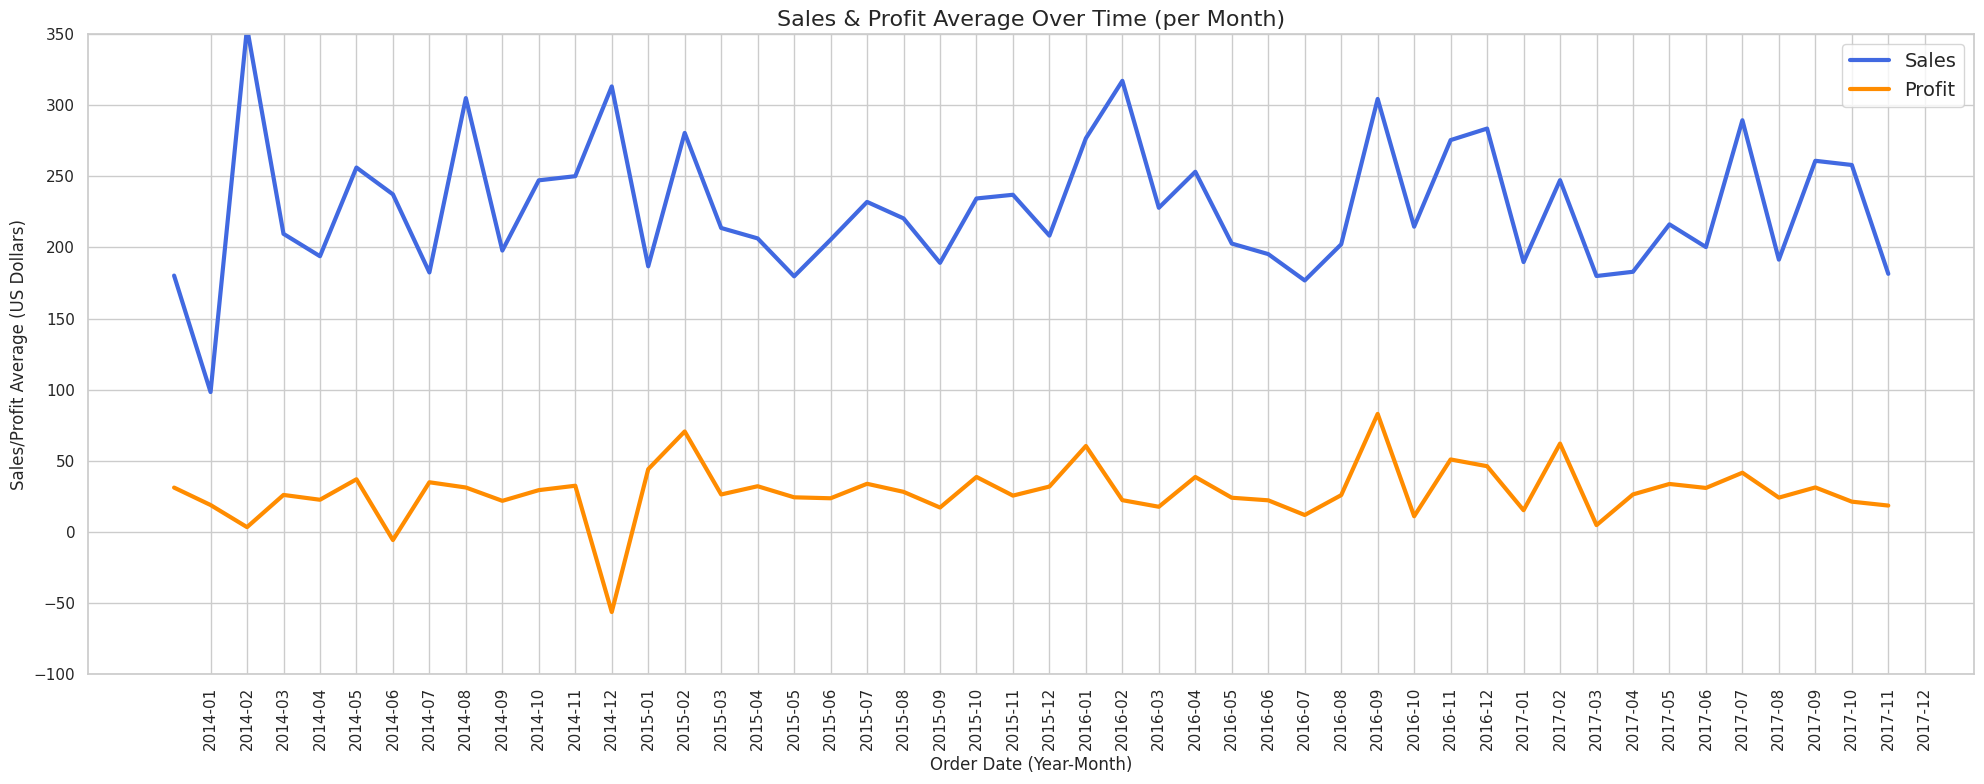

In [72]:
figure = plt.figure(figsize=(20,8))

# Sort and format the data
time_superstore = superstore[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_superstore['MonthYr'] = pd.to_datetime(superstore['Order Date']).dt.to_period('M')

# Calculate monthly averages for Sales and Profit
time_df_avg = time_superstore.groupby('MonthYr').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()

# Plot Sales and Profit
plt.plot(time_df_avg.index, time_df_avg['Sales'], color='royalblue', label='Sales', linewidth=3)
plt.plot(time_df_avg.index, time_df_avg['Profit'], color='darkorange', label='Profit', linewidth=3)

# Set x-axis labels
plt.xlabel('Order Date (Year-Month)')
labels = time_df_avg['MonthYr'].values
plt.xticks(range(1, time_df_avg.shape[0]+1), labels=labels)
plt.xticks(rotation=90)

# Adjust y-axis limit and add currency label
plt.ylim([-100, 350])
plt.ylabel('Sales/Profit Average (US Dollars)')

# Add legend and title
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time (per Month)', size=16)

plt.tight_layout()
plt.show()


**Observations:**

- Product discounts have minimal impact on profits. The relationship between discounts and profitability appears weak. This suggests that reducing prices may not significantly drive profit growth. Further analysis may be needed to confirm this trend.

- This indicates that our third hypothesis is incorrect, as discounts have a minimal impact on profits.

<Figure size 2000x800 with 0 Axes>

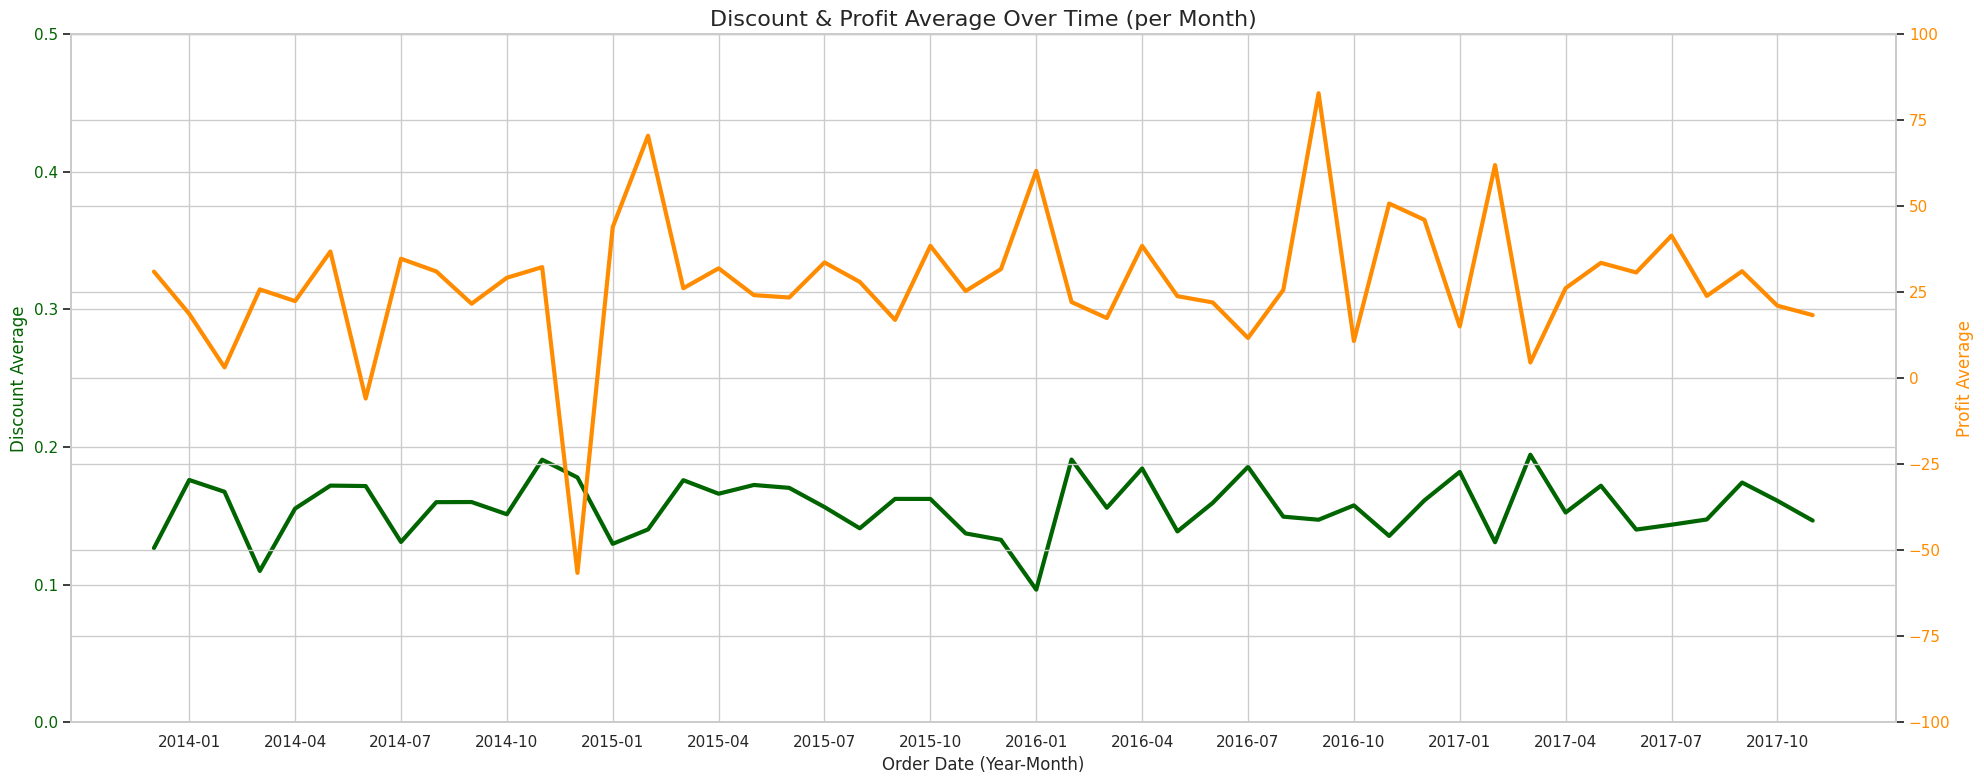

In [73]:
figure = plt.figure(figsize=(20,8))

# Sort and format the data
time_superstore = superstore[['Order Date', 'Discount', 'Profit']].sort_values(by='Order Date')
time_superstore['MonthYr'] = pd.to_datetime(superstore['Order Date']).dt.to_period('M')

time_df_avg = time_superstore.groupby('MonthYr').agg({'Discount':'mean', 'Profit':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(20,8))

# Plotting Discount (left y-axis)
ax1.plot(time_df_avg.index, time_df_avg['Discount'], color='darkgreen', label='Discount', linewidth=3)
ax1.set_xlabel('Order Date (Year-Month)')
ax1.set_ylabel('Discount Average', color='darkgreen')
ax1.set_ylim([0, 0.5])
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Plotting Profit (right y-axis)
ax2 = ax1.twinx()
ax2.plot(time_df_avg.index, time_df_avg['Profit'], color='darkorange', label='Profit', linewidth=3)
ax2.set_ylabel('Profit Average', color='darkorange')
ax2.set_ylim([-100, 100])
ax2.tick_params(axis='y', labelcolor='darkorange')

labels = time_df_avg['MonthYr'].values
plt.xticks(range(1, time_df_avg.shape[0]+1, 3), labels=labels[::3], rotation=45, ha='right')


plt.title('Discount & Profit Average Over Time (per Month)', size=16)
fig.tight_layout()
plt.show()


**Observations:**

- Discounts do not seem to boost profits, but they appear to follow a similar trend if compared to sales growth, with some overlapping periods. I.e. we can assume discounts bring about an increase in sales, creating customer engagement in purchasing at ***MegaMart Hub.***

- However, the full picture for those overlapping periods remains unclear due to a lack of insight into the broader economic conditions of those years and the specific pricing strategies used.

<Figure size 2000x800 with 0 Axes>

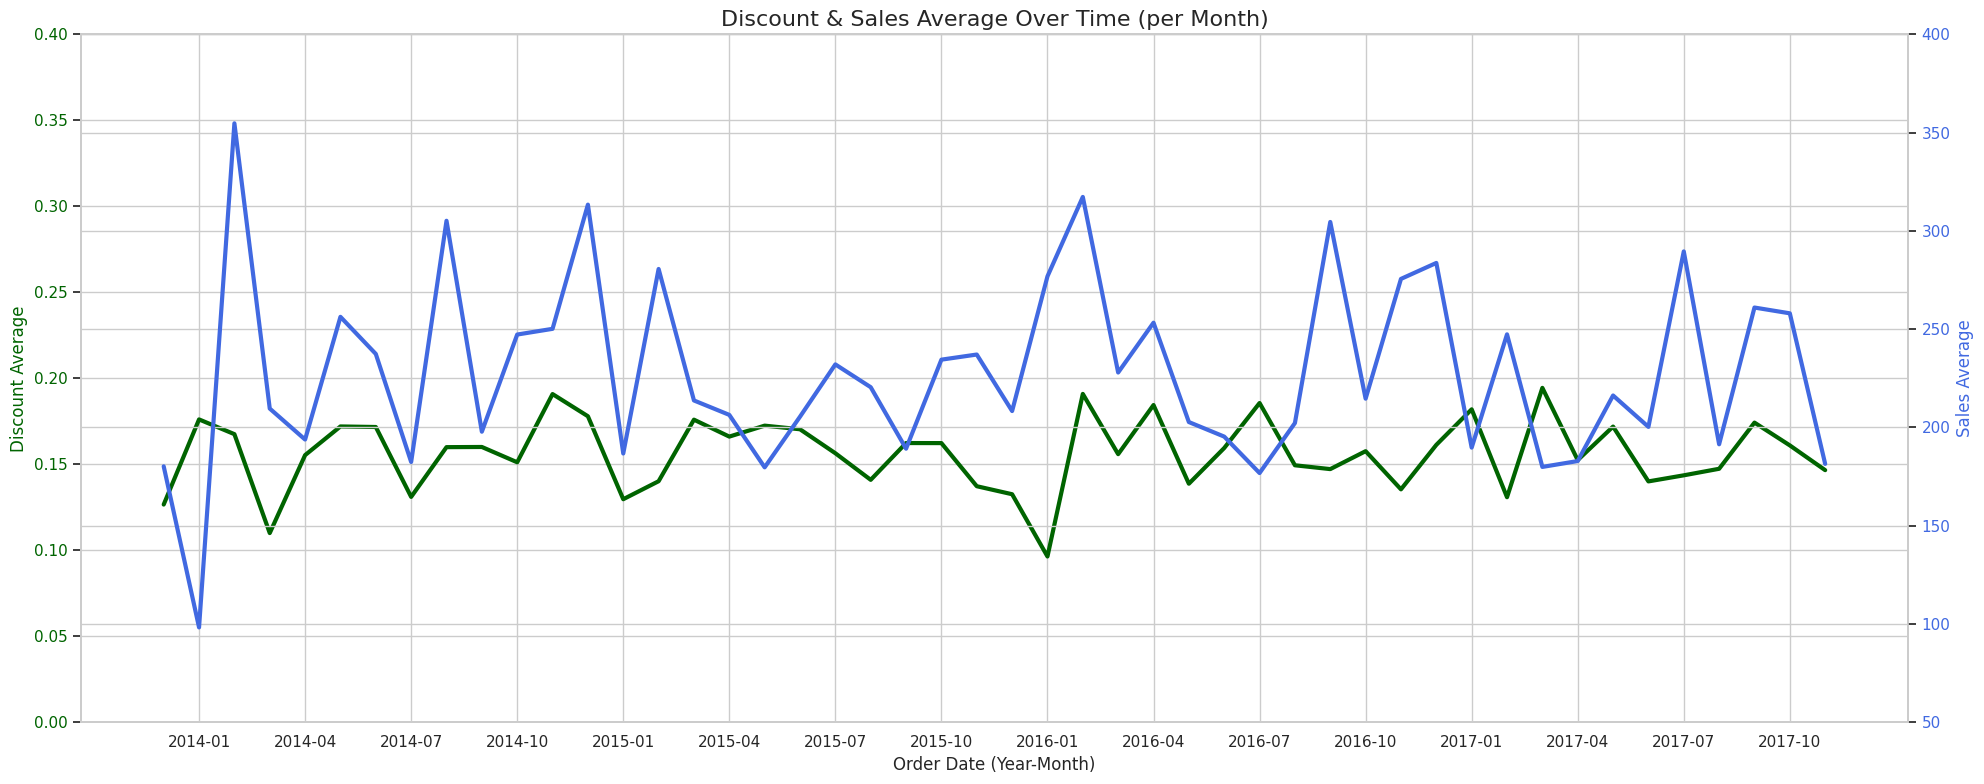

In [74]:
figure = plt.figure(figsize=(20,8))

# Sort and format the data
time_superstore = superstore[['Order Date', 'Discount', 'Sales']].sort_values(by='Order Date')
time_superstore['MonthYr'] = pd.to_datetime(superstore['Order Date']).dt.to_period('M')

# Calculate monthly averages for Discount and Sales
time_df_avg = time_superstore.groupby('MonthYr').agg({'Discount':'mean', 'Sales':'mean'}).reset_index()

# Plot Discount and Sales
fig, ax1 = plt.subplots(figsize=(20,8))

# Plotting Discount (left y-axis)
ax1.plot(time_df_avg.index, time_df_avg['Discount'], color='darkgreen', label='Discount', linewidth=3)
ax1.set_xlabel('Order Date (Year-Month)')
ax1.set_ylabel('Discount Average', color='darkgreen')
ax1.set_ylim([0, 0.4])
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Plotting Sales (right y-axis)
ax2 = ax1.twinx()
ax2.plot(time_df_avg.index, time_df_avg['Sales'], color='royalblue', label='Sales', linewidth=3)
ax2.set_ylabel('Sales Average', color='royalblue')
ax2.set_ylim([50, 400])
ax2.tick_params(axis='y', labelcolor='royalblue')

labels = time_df_avg['MonthYr'].values
plt.xticks(range(1, time_df_avg.shape[0]+1, 3), labels=labels[::3], rotation=45, ha='right')

plt.title('Discount & Sales Average Over Time (per Month)', size=16)
fig.tight_layout()
plt.show()

###3.2.3 Bar Plot

In the graph below we can draw the following observations:

- The best-selling sub-categories are **Phones and Chairs**, together contributing with nearly 29% of the total sales.

- On the other hand, **Labels and Fasteners** had a low sales rate (0.67% together).

- The sub-categories generating the highest profits are **Copiers** with $55,617.

- Following, **Phones** belong to the sub-category with the second highest profit with $44,515.

- **Tables** stand as the most unprofitable sub-category, with a loss of almost ($18,000).

- Notably, loss-making items like **Tables, Bookcases and Supplies** account for 16% of total sales.

- The most ordered items are **office supplies**, making up 60% of all orders, with Binders alone representing 16% of those.

Top Selling Sub-Categories:
Phones: 330007.054 (Percentage: 14.37%)
Chairs: 328449.103 (Percentage: 14.30%)

Least Selling Sub-Categories:
Labels: 12486.312 (Percentage: 0.54%)
Fasteners: 3024.28 (Percentage: 0.13%)

Most Profitable Sub-Categories:
Copiers: 55617.8249
Phones: 44515.7306

Least Profitable Sub-Categories:
Bookcases: -3472.556
Tables: -17725.4811

Most Ordered Sub-Categories:
Binders: 5974 (Percentage: 15.77%)
Paper: 5178 (Percentage: 13.67%)

Least Ordered Sub-Categories:
Machines: 440 (Percentage: 1.16%)
Copiers: 234 (Percentage: 0.62%)


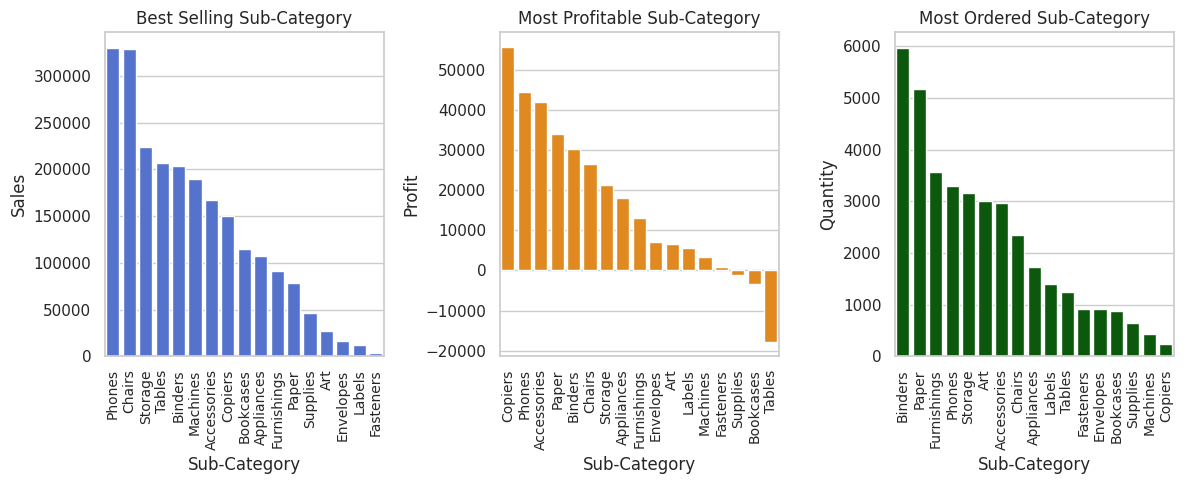

In [75]:
# Group subcategory by sales, profit, and quantity
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit', 'Quantity']].sum())

# Define subcat_sales, subcat_profit, and subcat_Quantity
subcat_sales = subcat_analysis[['Sales']].sort_values(by='Sales', ascending=False)
subcat_profit = subcat_analysis[['Profit']].sort_values(by='Profit', ascending=False)
subcat_Quantity = subcat_analysis[['Quantity']].sort_values(by='Quantity', ascending=False)

# Calculate total sales for percentage calculations
total_sales = subcat_analysis['Sales'].sum()

# Top 2 and least 2 best selling sub-categories by percentage
top_sales = subcat_sales.head(2)
least_sales = subcat_sales.tail(2)

print("Top Selling Sub-Categories:")
for index, row in top_sales.iterrows():
    percentage = (row['Sales'] / total_sales) * 100
    print(f"{index}: {row['Sales']} (Percentage: {percentage:.2f}%)")

print("\nLeast Selling Sub-Categories:")
for index, row in least_sales.iterrows():
    percentage = (row['Sales'] / total_sales) * 100
    print(f"{index}: {row['Sales']} (Percentage: {percentage:.2f}%)")

# Two most and least profitable sub-categories
most_profitable = subcat_profit.head(2)
least_profitable = subcat_profit.tail(2)

print("\nMost Profitable Sub-Categories:")
for index, row in most_profitable.iterrows():
    print(f"{index}: {row['Profit']}")

print("\nLeast Profitable Sub-Categories:")
for index, row in least_profitable.iterrows():
    print(f"{index}: {row['Profit']}")

# Calculate total quantity for percentage calculations
total_quantity = subcat_analysis['Quantity'].sum()

# Most and least ordered sub-categories by percentage
top_quantity = subcat_Quantity.head(2)
least_quantity = subcat_Quantity.tail(2)

print("\nMost Ordered Sub-Categories:")
for index, row in top_quantity.iterrows():
    percentage = (row['Quantity'] / total_quantity) * 100
    print(f"{index}: {row['Quantity']} (Percentage: {percentage:.2f}%)")

print("\nLeast Ordered Sub-Categories:")
for index, row in least_quantity.iterrows():
    percentage = (row['Quantity'] / total_quantity) * 100
    print(f"{index}: {row['Quantity']} (Percentage: {percentage:.2f}%)")


sns.set_theme(style="whitegrid")

figure, axis = plt.subplots(1, 3, figsize=(12, 5))

# Plot bar plot for best selling sub-category
subcat1 = sns.barplot(data=subcat_sales, x=subcat_sales.index, y=subcat_sales.Sales, ax=axis[0], palette=['royalblue']*len(subcat_sales))
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(), rotation="vertical", size=10)

# Plot bar plot for most profitable sub-category
subcat2 = sns.barplot(data=subcat_profit, x=subcat_profit.index, y=subcat_profit.Profit, ax=axis[1], palette=['darkorange']*len(subcat_profit))
subcat2.set(title="Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(), rotation="vertical", size=10)

# Plot bar plot for most ordered sub-category
subcat3 = sns.barplot(data=subcat_Quantity, x=subcat_Quantity.index, y=subcat_Quantity.Quantity, ax=axis[2], palette=['darkgreen']*len(subcat_Quantity))
subcat3.set(title="Most Ordered Sub-Category")
subcat3.set_xticklabels(subcat3.get_xticklabels(), rotation="vertical", size=10)

figure.tight_layout()
plt.show()


**Observations:**

- The sub-categories with the lowest profits, Tables and Bookcases, stand out. Interestingly, despite their negative profit margins, they show strong sales figures in the previous graph.

- So, why are their profits in the negative? Possible reasons could include operational inefficiencies, such as poor inventory or storage management, or unexpected events like natural disasters leading to inventory loss or shifts in suppliers / vendors, which could have affected pricing and profitability, among other factors.

In [76]:
# Calculate total sales and total profit
total_sales = superstore['Sales'].sum()
total_profit = superstore['Profit'].sum()
total_quantity = superstore['Quantity'].sum()

# Print the calculated values
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Total Quantity: {total_quantity}")


Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Total Quantity: 37873


**Observations:**

- The visualization below provides a summary of the ten cities with the highest sales and profit.

- Topping the list for Sales are **New York City, Los Angeles, Seattle, San Francisco**, and Philadelphia—some of the most populous cities in the U.S., suggesting that high sales may be driven by the sheer volume of demographics.

- For Profit, the top five cities are **New York City, Los Angeles, Seattle, San Francisco**, and Detroit. Interestingly, Philadelphia does not appear among the top ten most profitable cities despite being in the top five in highest volume of sales, which highlights a potential area for future analysis.



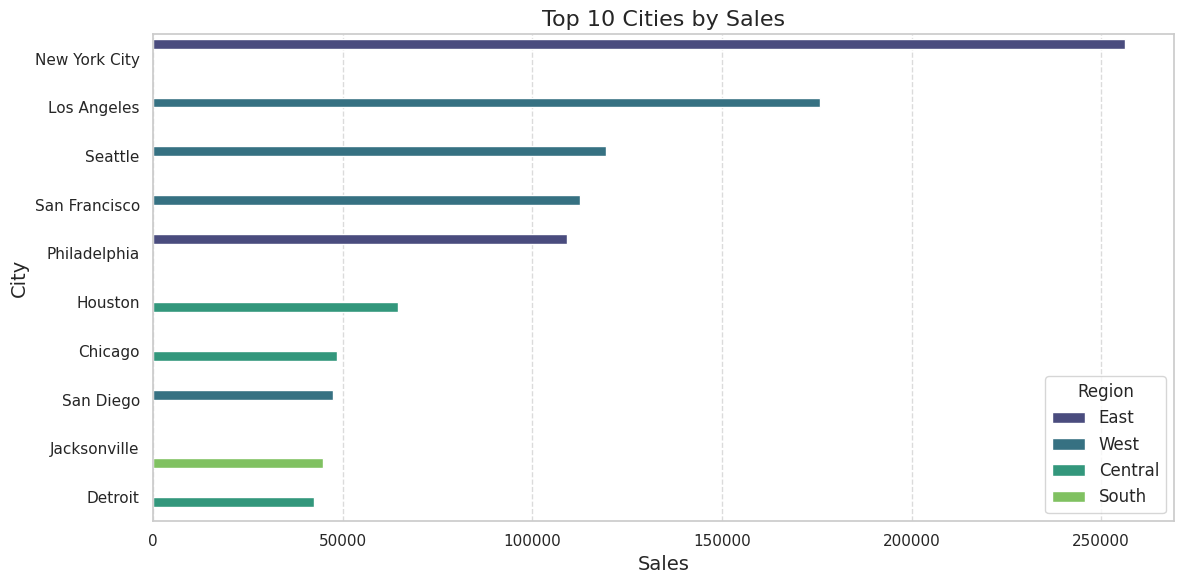

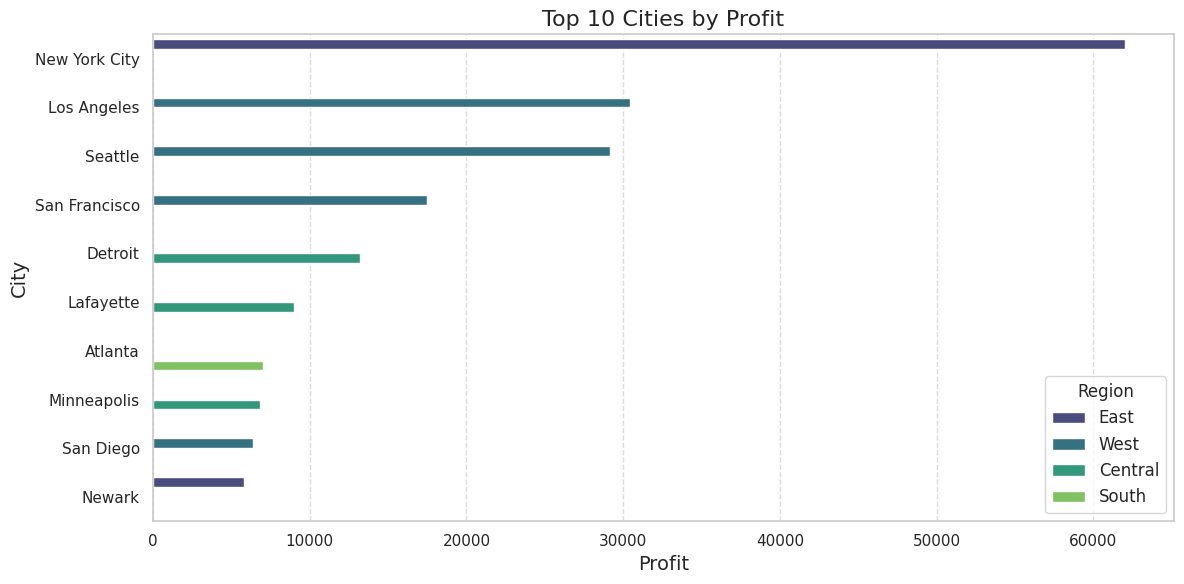

,Region,City,Sales,Profit
254,East,New York City,256368.161,62036.9837
494,West,Los Angeles,175851.341,30440.7579
558,West,Seattle,119540.742,29156.0967
547,West,San Francisco,112669.092,17507.3854
44,Central,Detroit,42446.944,13181.7908
88,Central,Lafayette,19630.450,8976.0973
294,South,Atlanta,17197.840,6993.6629
106,Central,Minneapolis,16870.540,6824.5846
546,West,San Diego,47521.029,6377.1960
255,East,Newark,28576.119,5793.7588


In [77]:
# Group by region and city to sum Sales and Profit
sales_profit_by_region_city = superstore.groupby(['Region', 'City'])[['Sales', 'Profit']].sum().reset_index()

def top(data, parameter, top=10):
    data = data.sort_values(by=[parameter], ascending=False)[:top]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x=parameter, y='City', hue='Region', palette='viridis', dodge=True)
    plt.title(f'Top {top} Cities by {parameter}', fontsize=16)
    plt.xlabel(parameter, fontsize=14)
    plt.ylabel('City', fontsize=14)
    plt.legend(title='Region', loc='best', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()
    return data

# Call the function for Sales and Profit
top(sales_profit_by_region_city, 'Sales', top=10)
top(sales_profit_by_region_city, 'Profit', top=10)


**Observations:**

- Next, we examine the ten cities with the highest and lowest profits, focusing particularly on the seven sub-categories that stood out to us.

- Notably, the negative profits in the Tables sub-category were particularly significant in New York City and Philadelphia, both situated in the eastern region of the country.

- Additionally, in Philadelphia, the overall most profitable sub-category, Phones, also reported negative profits, along with Bookcases, which falls under the least profitable sub-category.

In [78]:
# Group by Sub-Category and City, summing up the profits
aux_df = superstore.groupby(['Sub-Category', 'City'])[['Profit']].sum().reset_index()

# Filter to include only the specified sub-categories
selected_subcategories = ['Phones', 'Chairs', 'Labels', 'Fasteners', 'Copiers', 'Bookcases', 'Tables']
aux_df = aux_df[aux_df['Sub-Category'].isin(selected_subcategories)]

# Calculate total profit by City
total_profit_by_city = aux_df.groupby('City')['Profit'].sum().reset_index()

# Get the ten most and least profitable cities
most_profitable_cities = total_profit_by_city.nlargest(10, 'Profit')
least_profitable_cities = total_profit_by_city.nsmallest(10, 'Profit')

# Combine the most and least profitable cities
combined_cities = pd.concat([most_profitable_cities, least_profitable_cities])

# Merge back to include sub-category information
aux_combined = aux_df[aux_df['City'].isin(combined_cities['City'])]

# Create a bar plot
fig = px.bar(
    aux_combined,
    x='Profit',
    y='City',
    color='Sub-Category',
    color_discrete_sequence=px.colors.qualitative.T10,
    title='Top 10 Most and Least Profitable Cities by Sub-Category'
)

fig.update_layout(height=900, xaxis_title='Total Profit', yaxis_title='City')

fig.show()



## 3.3 Categorical Visualization

###3.3.1 Pie Chart

A pie chart is mainly used to visualize categorical data by illustrating the proportional representation of various categories within a dataset. It provides a quick way to understand the distribution of a particular feature across different classes or categories.<br><br>

We had a quick look at the segments or types of customers, i.e. Consumer, Corporate and Home Office and their distribution in Sales and Profitability.<br><br>

**Observations:**

- The Consumer segment accounts for just over half (50.6%) of total sales, with the highest share of profitability at 46.8%.<br><br>

- The Corporate segment contributes 30.7% of total sales and 32.1% of total profits.<br><br>

- Home Office has a slightly smaller share, representing 18.7% of sales and 21.1% of profits.<br><br>

- Below the pie chart, the profit-to-sales ratio offers a clearer comparison, revealing that all three segments exhibit relatively similar profit margins. This suggests that MegaMart Hub understands its customers and is actively working to maintain balanced profitability across segments.  



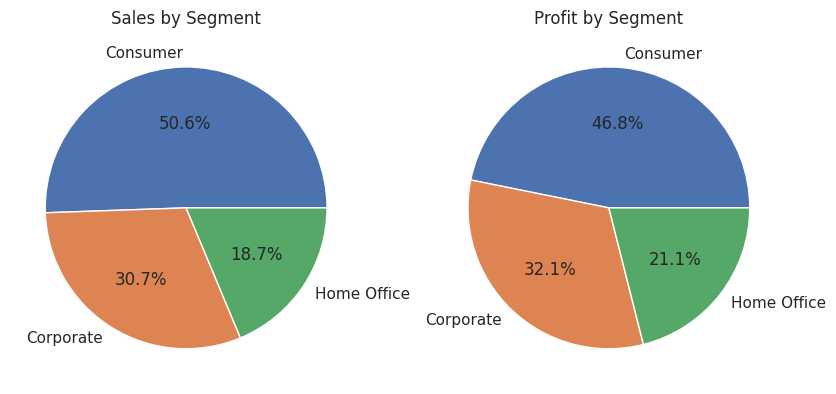

In [79]:
sales_profit_by_segment = superstore.groupby(['Segment'])[['Sales', 'Profit']].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].pie(sales_profit_by_segment['Sales'], labels=sales_profit_by_segment['Segment'], autopct='%1.1f%%')
ax[0].title.set_text('Sales by Segment')
ax[1].pie(sales_profit_by_segment['Profit'], labels=sales_profit_by_segment['Segment'], autopct='%1.1f%%')
ax[1].title.set_text('Profit by Segment')

In [80]:
sales_profit_by_segment['Profit/Sales'] = sales_profit_by_segment['Profit']/sales_profit_by_segment['Sales']
sales_profit_by_segment

,Segment,Sales,Profit,Profit/Sales
0,Consumer,1.161401e+06,134119.2092,0.115481
1,Corporate,7.061464e+05,91979.1340,0.130255
2,Home Office,4.296531e+05,60298.6785,0.140343


## 3.4 Box Plot
  

A box plot, commonly referred to as a whisker plot, is a standardized method for visualizing the distribution of a dataset through five summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It effectively highlights the central tendency, variability, and possible outliers in the data. The box illustrates the interquartile range (IQR), which encompasses the middle 50% of the dataset, while the "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the quartiles. Box plots are especially valuable for comparing distributions among different groups.



**Observations:**

- As seen in our previous observations, sales had a high mark whereas profit dropped dramatically in January 2015. This is not a pattern perceived throughout the other months and we can define those results as outliers.

- Quantity and Discount do not present great visibility of outliers.

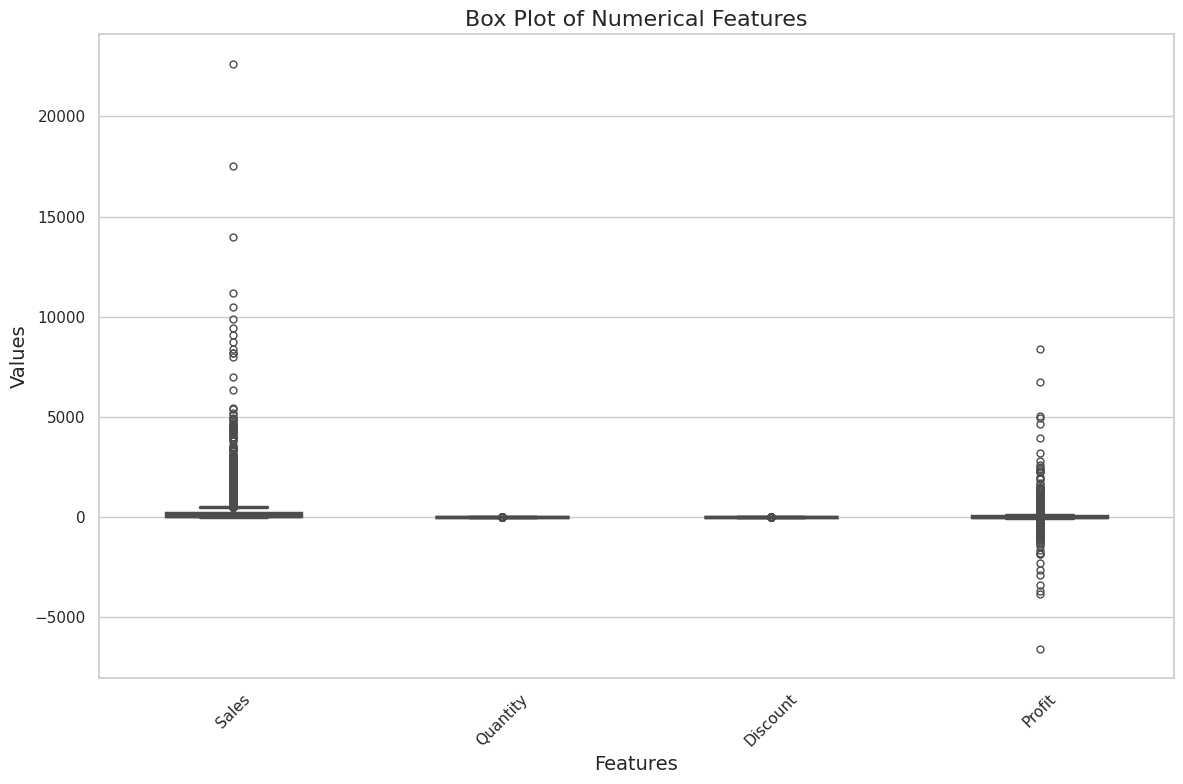

In [81]:
# Retain 'Row ID' in superstore_con but exclude it in the plot
superstore_con = superstore.select_dtypes(include=[np.number])

# Melt the data excluding 'Row ID' for visualization purposes
melted_data = pd.melt(superstore_con.drop(columns=['Row ID']), var_name='variable', value_name='value')

# Create the box plot
plt.figure(figsize=[12, 8])
sns.boxplot(
    x="variable",
    y="value",
    data=melted_data,
    width=0.5,
    palette=['darkorange'],
    linewidth=2.5,
    whis=1.5,
    flierprops=dict(marker='o', color='red', markersize=5)  # Customize outliers
)

plt.title("Box Plot of Numerical Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


## 3.5 Visualization - Correlation Matrix and Scatterplot

Multimodal visualizations are vital for data analysis, as they combine various visual representations, such as heatmaps and scaterplot, to provide a comprehensive view of complex datasets. This integration helps identify patterns, relationships, and anomalies in the data.

A correlation matrix is a specific visualization that summarizes the relationships between multiple variables, displaying correlation coefficients in a grid format. This allows analysts to assess the strength and direction of relationships, aiding in feature selection and model efficiency.

Each cell in the matrix represents the correlation between two variables, with values ranging from -1 to +1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. In machine learning, correlation matrices are instrumental in feature selection, as they help identify which features are most relevant to the target variable.



### 3.5.1 Correlation Matrix

A correlation matrix is a specific visualization that summarizes the relationships between multiple variables, displaying correlation coefficients in a grid format. This allows analysts to assess the strength and direction of relationships, aiding in feature selection and model efficiency.<br>

Each cell in the matrix represents the correlation between two variables, with values ranging from -1 to +1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. In machine learning, correlation matrices are instrumental in feature selection, as they help identify which features are most relevant to the target variable.<br><br>

**Observations:**

- In the Heatmap below we see a moderate correlation between Sales and Profit, i.e. when Sales increases, Profit is likely to increase.
- For the negative correlation between Profit and Discount, the higher the discount applied, the lower is the profit.

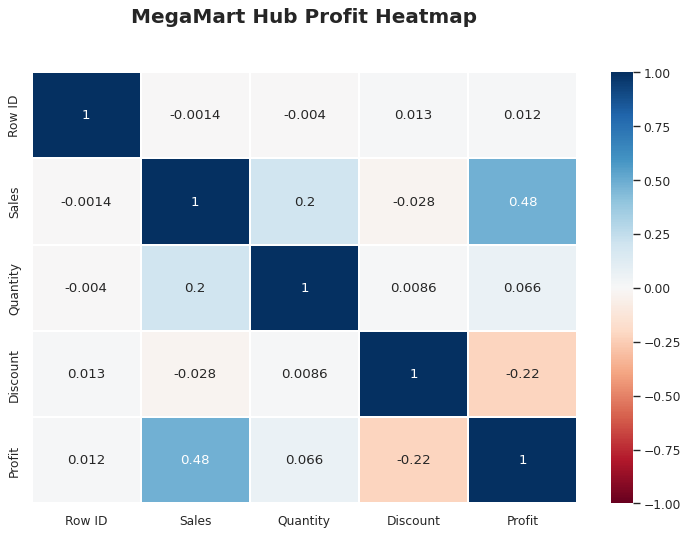

In [82]:
fig, ax = plt.subplots(figsize=(11, 7), dpi=80)
ax.set_title("MegaMart Hub Profit Heatmap", fontsize=18, fontweight='bold', y=1.1)
sns.heatmap(superstore_con.corr(), annot=True, cmap='RdBu', linewidths=0.3, ax=ax, vmin=-1, vmax=1);


###3.5.2 Scatterplot

Scatter plots are another important visualization tool that explores the relationship between two continuous variables. By plotting data points in a two-dimensional space, scatter plots reveal trends, clusters, and outliers, enabling analysts to identify correlations and assess the distribution of target variables. These visualizations are essential for choosing appropriate algorithms and preprocessing methods in predictive modeling.

**Observations:**

- When examining Sales, we notice that many high-sales transactions result in negative profits.

- Additionally, higher discounts are closely linked to lower profits. Although discounts can drive sales, they often come at the cost of overall profitability.

- While larger quantities generally lead to higher profits, this is not consistently the case.

In [ ]:
sns.pairplot(superstore_con, hue="Profit", palette='viridis', height = 2.2)
plt.suptitle("Pairplot - Numerical Features", fontsize=14, fontweight="bold", y=1.05)
plt.show()

# 4.0 Data Preprocessing

In this section, the data will be preprocessed aiming to prepare it for training a machine learning model. Data preprocessing is essential to identify any missing values, errors, or elements that could reduce the accuracy of predictions. Fortunately, as noted in section 3.1, there are no missing or duplicated values.

We will emphasize our efforts in understanding the trends across different sub-categories in order to identify which sub-categories have the greatest impact on profit.

With this goal in mind, we will determine which columns to keep and which ones to drop, we will manage outliers previously identified and make other transformations in the data.

## 4.1 Data Cleaning

We will drop the following columns to make our dataset concise and aligned with our problem. We want to **understand which sub-categories of the dataset contribute the most for profit and losses.**

The columns include the ones related to ID and those with extremely high cardinality, as they will not contribute meaningfully to our predictions. This will also be important when we split the dataset between test and training.

Columns to be dropped:

1. Row ID
2. Order ID
3. Order Date
4. Ship Date
5. Ship Mode
6. Customer ID
7. Customer Name
8. Country
9. State
10. Postal Code
11. Product ID
12. Product Name



Let us create a copy of our dataset to ensure that any changes we make will not alter the original version.

In [ ]:
# A copy of the dataset superstore with all the original columns

superstore_copied = superstore

In [ ]:
# Removing the columns mentioned above

columns_to_drop = ["Row ID", "Order ID", "Order Date", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Country", "State", "Postal Code", "Product ID", "Product Name"]

superstore_copied = superstore_copied.drop(columns=columns_to_drop)

# Show the first dataset copy rows to visualize the remaining columns

superstore_copied.head()

In [ ]:
# Check how many features we have in the new copy

print(superstore_copied.shape)

In [ ]:
print(superstore_copied.dtypes)

Now we have 9 features in our copied dataset, being five of them of object type.

### 4.1.1 Outliers

Potential outliers were identified in the features Sales and Profit, and we will remove certain values in rows observed in the visualizations, which were crucial for spotting them. We will look into the other numerical features in case outliers were also present.

The Box Plot below has been adjusted and outliers removed, as intended. Profit, that once had very negative numbers, is not better distributed. And as for Sales, the values are expected to increase in certain periods of operation.

In [ ]:
# Outliers Removal

def remove_outlier(superstore_copied,k=3.33):
    for col in superstore_copied.columns:
            if (superstore_copied[col].dtype=="int64" or superstore_copied[col].dtype=="float64"):
                mean = superstore_copied[col].mean()
                global ds
                std = superstore_copied[col].std()
                outlier = [i for i in superstore_copied[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]
                ds = superstore_copied.loc[superstore_copied[col].isin(outlier)]

In [ ]:
remove_outlier(superstore_copied,k=3.33)

In [ ]:
# Checking the Boxplot to see if outliers were removed

ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

### 4.1.2 Label Encoding

For the categorical data, we will implement Label Encoding for better results.

Label Encoding is a technique used to transform categorical data into numerical form, by assigning a unique integer to each category. This allows machine learning models to interpret categorical variables.

Let us quickly check our data type so we know which features need to be converted to numerical form.

In [ ]:
superstore_copied.dtypes

Now we have a quick look at the unique values for the categorical features.

In [ ]:
# Create a list to store the results
unique_entries = []

# Loop through the categorical columns and store the number of unique entries
for col in superstore_copied.columns:
    if superstore_copied[col].dtype == 'object':
        unique_entries.append([col, superstore_copied[col].nunique()])

# Convert the list to a DataFrame for a tabular view
unique_entries_df = pd.DataFrame(unique_entries, columns=["Column", "Unique Entries"])
print(unique_entries_df)

Now we will transform our categorical to numerical values using Label Encoding.

In [ ]:
# Define the ModifiedLabelEncoder class

class ModifiedLabelEncoder(LabelEncoder):

    # Apply fit_transform to the df

    def fit_transform(self, y, *args, **kwargs):
        return y.apply(super(ModifiedLabelEncoder, self).fit_transform, result_type='expand')

    # Apply transform to the df

    def transform(self, y, *args, **kwargs):
        return y.apply(super(ModifiedLabelEncoder, self).transform, result_type='expand')

# Instantiate the encoder
encoder = ModifiedLabelEncoder()

# Select the categorical columns for encoding
categorical_cols = superstore_copied.select_dtypes(include=['object']).columns

# Apply fit_transform to the categorical columns in superstore_copied
superstore_copied[categorical_cols] = encoder.fit_transform(superstore_copied[categorical_cols])


In [ ]:
# Verifying the data types after the transformation

superstore_copied.dtypes

### 4.1.3 Splitting the Data into Training Set and Test Set

We will now divide our dataset into a training set and a test set. This step is crucial for assessing how well the model performs on unseen data, ensuring it can generalize effectively. The training set is used to fine-tune the model's parameters, while the test set serves to evaluate its performance on data it hasn't encountered before.

Typically, we allocate 20% of the data for testing and the remaining 80% for training. This split is achieved using the "train_test_split" function, and specifying a seed ensures the division is consistent. Since our class distribution is balanced, there's no need for stratification during the split.

In [ ]:
# Let us check if the classes are balanced

print(superstore_copied.groupby('Profit').size())

In [ ]:
# Define features (X) and target (y)
X = superstore_copied.drop('Profit', axis=1)  # Features
y = superstore_copied['Profit']  # 'Profit is the Target

# Split the data into training and testing sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

### 4.1.4 Normalization and Standardization

Normalization and standardization are important data preprocessing techniques used to adjust the scale of features in a dataset. These methods ensure that all attributes are on comparable scales, preventing features with larger values from disproportionately influencing machine learning models.

Below we will split the dataset into input (X) and output (Y) components. Then, we will apply normalization and standardization techniques to the numerical input variables, creating separate datasets for each technique.

In [ ]:
# Select numerical columns (excluding the target 'Profit' because we want to see real ranges)

numerical_cols = superstore_copied.select_dtypes(include=[np.number]).columns

# Normalization: using MinMaxScaler (values will range between 0 and 1)
scaler = MinMaxScaler()

# We create a copy to ensure the original DataFrame remains unchanged
superstore_normalized = superstore_copied.copy()

# Apply normalization
superstore_normalized[numerical_cols] = scaler.fit_transform(superstore_copied[numerical_cols])

print("Normalized Data:")
print(superstore_normalized.head())



In [ ]:
# Standardization: using StandardScaler (mean = 0, std = 1)
standardizer = StandardScaler()

# We create another copy for standardization
superstore_standardized = superstore_copied.copy()

# Apply standardization
superstore_standardized[numerical_cols] = standardizer.fit_transform(superstore_copied[numerical_cols])

print("Standardized Data:")
print(superstore_standardized.head())

# 5.0 Conclusion

In this project, we examined informative details on a fictitious superstore called ***MegaMart Hub***. They are composed of operational data using various features, however, our focus was on observing whether certain Sub-categories influence profits at ***MegaMart Hub***. <br><br>

We have developed some descriptive statistics and visualizations to gather insightful information about our data and, thus, answer objective and some hypotheses related to profit. <br><br>

Furthermore, we preprocessed and cleaned our data, managed outliers, applied Label encoding to the categorical features, separated the data into Training and Test sets and, finally, did Normalization and Standardization techniques for training a Machine Learning Model in the future. <br><br>

Let us assemble our proposed hypotheses:

- Is the profit higher during the end of the year seasonal period (November - December / Christmas)? In session 3.2.1 we confirmed profits are highest during that period.

- Is the profit lower during January and February, after the end of the year seasonal period? Yes, there was a significant drop in orders during that period, as observed in session 3.2.1.

- Has the discount applied on products had a positive impact on the profits? Although high discounts did increase sales, our analysis concluded the highest the discount, the lowest the profits.

- Can we say that higher sales translate into higher profit for MegaMart Hub? This can be seen in few periods throughout the years but the majority of the time, the profit would not grow as the sales grew.

- If so, does profit grow at the same scale as sales? No, those variables did not follow the same trend.<br><br>

Going back to our objective, our goal was to reflect on ***determining whether MegaMart Hub's profitability, both gains and losses, is driven by specific Sub-categories of the dataset.***
<br><br>

The sub-categories with the highest profits were **Copiers and Phones** and the ones with the lowest profits were **Tables and Bookcases**:

- Tables and Bookcases show strong sales figures contrasting with low profits, which raise the issue of operational inefficiencies, such as poor inventory or storage management, or unexpected events like natural disasters leading to inventory loss or shifts in suppliers / vendors, which could have affected pricing and profitability, amongst other factors.

- Copiers are topping the list of most profitable Sub-categories, however, it is not ranked well in the top-sellers. This might be due to the nature of the products in this sub-categories, which usually have longer durability and less of a need for replacements.


# 6.0 Recommendations

Since we saw profitability issues comparing to high Sales, the pricing strategy and cost structure should be reviewed to understand the case of potential inefficiencies or cost overruns.<br><br>

Another consideration is the high discounts with low profits as a result. While discounts may boost sales, they often reduce overall profitability. Discounts should be applied more carefully, perhaps focusing on specific product sub-categories. <br><br>

If we take a look on most ordered Sub-categories, we will see that **Office Supplies** is topping the list with **60%.** Perhaps applying promotional prices to tables and bookcases (i.e. lowest profit Sub-categories) combined with other office supplies as a package, could boost the overall profitability.<br><br>

Another key point to note is the full-price in sales. Sales that had zero discounts were generally the most profitable. This could be an opportunity to encourage customers to purchase at full price and, thus, improve profit margins. This is usually done through better marketing or product positioning.

# 7.0 Further Considerations

We have removed features with some level of impact on the Sub-categories profitability analysis. However, we are not examining them in this project due to time constraints and limited detailed information in the data.<br><br>

For instance, features such as Ship Date and Ship Mode are additional and somewhat valuable features to understand profit or losses. They might increase operational costs because they are closely related to inventory / order quantity and Order Date. <br><br>

Consider the impact if sales planning were miscalculated, ***MegaMart Hub*** would be forced to change storage quantity, adjust vendors negotiations, reorganise the distribution center operations and shipping modes (goods carried by truck, train, ship or airplanes?) would be changed to fit in to the customers' expected delivery date, amongst other issues.<br><br>  

We also observed that while Philadelphia ranks in the top 5 for sales, it does not appear among the top 5 for highest profits. This summons for further investigations, by analysing inventory management and other assembled variables. Tables, our top lowest profit Sub-category, is mostly showing as a loss in that city. This can be seen in session 3.2.3.<br><br>

For further analysis, it would be a great asset to understand the cities with lowest sales and profitability by calculating losses with a new loss dataframe. From there, ***MegaMart Hub*** could evaluate if marketing and advertising efforts can create profitable results.



